In [4]:
import pandas as pd
import seaborn as sns

In [5]:
df = (
    pd
    .read_csv(
        r'kaggle-data/train.csv',
        index_col='Id'
    )
)

In [6]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


# Univariate EDA

## SalePrice

In [7]:
df['SalePrice'].isna().value_counts()

False    1460
Name: SalePrice, dtype: int64

In [8]:
(df['SalePrice'] > 0).value_counts()

True    1460
Name: SalePrice, dtype: int64

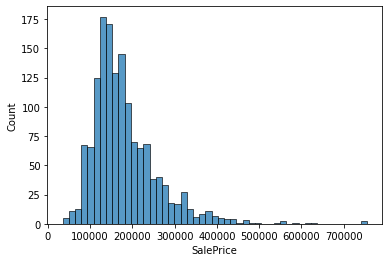

In [9]:
sns.histplot(df['SalePrice'])

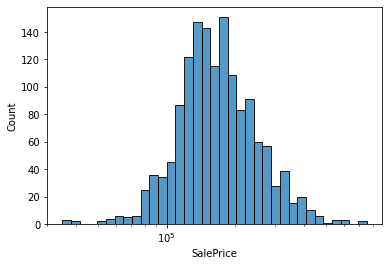

In [10]:
sns.histplot(df['SalePrice'], log_scale=True)

In [11]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

## Other cols

In [12]:
other_cols = [c for c in df.columns if c != 'SalePrice']

In [13]:
len(other_cols)

79

In [14]:
df.drop(columns='SalePrice').dtypes.value_counts()

object     43
int64      33
float64     3
dtype: int64

In [15]:
null_cols = [
    c for c in other_cols
    if (df[c].isna().any())
]

In [16]:
len(null_cols)

19

Will need to treat cols with nulls separately.

In [17]:
null_cols

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [18]:
not_null_cols = [c for c in other_cols if c not in null_cols]

### Non-null ints

In [19]:
not_null_ints = [
    c for c in not_null_cols
    if df.dtypes[c] == 'int64'
]

In [20]:
len(not_null_ints)

33

In [21]:
not_null_ints

['MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [22]:
for c in not_null_ints:
    print(c)
    print()
    print(df[c].value_counts().sort_index())
    print()

MSSubClass

20     536
30      69
40       4
45      12
50     144
60     299
70      60
75      16
80      58
85      20
90      52
120     87
160     63
180     10
190     30
Name: MSSubClass, dtype: int64

LotArea

1300      1
1477      1
1491      1
1526      1
1533      2
         ..
70761     1
115149    1
159000    1
164660    1
215245    1
Name: LotArea, Length: 1073, dtype: int64

OverallQual

1       2
2       3
3      20
4     116
5     397
6     374
7     319
8     168
9      43
10     18
Name: OverallQual, dtype: int64

OverallCond

1      1
2      5
3     25
4     57
5    821
6    252
7    205
8     72
9     22
Name: OverallCond, dtype: int64

YearBuilt

1872     1
1875     1
1880     4
1882     1
1885     2
        ..
2006    67
2007    49
2008    23
2009    18
2010     1
Name: YearBuilt, Length: 112, dtype: int64

YearRemodAdd

1950    178
1951      4
1952      5
1953     10
1954     14
       ... 
2006     97
2007     76
2008     40
2009     23
2010      6
Name: YearRe

In [23]:
df['MSSubClass'].value_counts()

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

### Non-null objects

In [24]:
not_null_objects = [
    c for c in not_null_cols
    if df.dtypes[c] == 'object'
]

In [25]:
len(not_null_objects)

27

In [26]:
not_null_objects

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'KitchenQual',
 'Functional',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [27]:
for c in not_null_objects:
    print(c)
    print()
    print(df[c].value_counts().sort_values(ascending=False))
    print()

MSZoning

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

Street

Pave    1454
Grvl       6
Name: Street, dtype: int64

LotShape

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

LandContour

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

Utilities

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

LotConfig

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

LandSlope

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

Neighborhood

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill  

Hm, these ones are trickier. Could skip or one hot encode to begin with?

### Non null floats

In [28]:
not_null_floats = [
    c for c in not_null_cols
    if df.dtypes[c] == 'float64'
]

In [29]:
not_null_floats

[]

### Null ints

In [30]:
null_ints = [
    c for c in null_cols
    if df.dtypes[c] == 'int64'
]

In [31]:
null_ints

[]

### Null objects

In [32]:
null_objects = [
    c for c in null_cols
    if df.dtypes[c] == 'object'
]

In [33]:
len(null_objects)

16

In [34]:
null_objects

['Alley',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [35]:
for c in null_objects:
    print(c)
    print()
    print(df[c].value_counts(dropna=False).sort_values(ascending=False))
    print()

Alley

NaN     1369
Grvl      50
Pave      41
Name: Alley, dtype: int64

MasVnrType

None       864
BrkFace    445
Stone      128
BrkCmn      15
NaN          8
Name: MasVnrType, dtype: int64

BsmtQual

TA     649
Gd     618
Ex     121
NaN     37
Fa      35
Name: BsmtQual, dtype: int64

BsmtCond

TA     1311
Gd       65
Fa       45
NaN      37
Po        2
Name: BsmtCond, dtype: int64

BsmtExposure

No     953
Av     221
Gd     134
Mn     114
NaN     38
Name: BsmtExposure, dtype: int64

BsmtFinType1

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
NaN     37
Name: BsmtFinType1, dtype: int64

BsmtFinType2

Unf    1256
Rec      54
LwQ      46
NaN      38
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

Electrical

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
NaN         1
Mix         1
Name: Electrical, dtype: int64

FireplaceQu

NaN    690
Gd     380
TA     313
Fa      33
Ex      24
Po      20
Name: FireplaceQu, dtype: int64

GarageType

A

Columns with many nan's could be ignored initially.

### Null floats

In [36]:
null_floats = [
    c for c in null_cols
    if df.dtypes[c] == 'float64'
]

In [37]:
null_floats

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [38]:
for c in null_floats:
    print(c)
    print()
    print(df[c].isna().value_counts())
    print()

LotFrontage

False    1201
True      259
Name: LotFrontage, dtype: int64

MasVnrArea

False    1452
True        8
Name: MasVnrArea, dtype: int64

GarageYrBlt

False    1379
True       81
Name: GarageYrBlt, dtype: int64



Not too many nulls, thankfully.

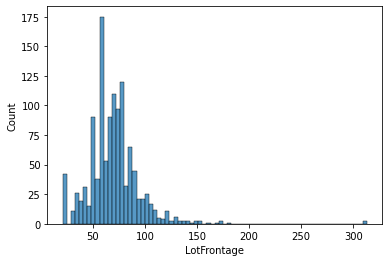

In [39]:
sns.histplot(df['LotFrontage'].dropna())

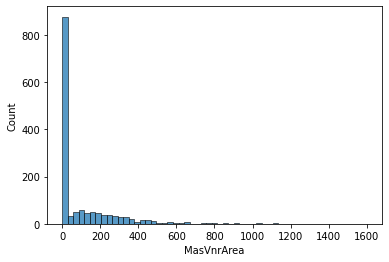

In [40]:
sns.histplot(df['MasVnrArea'].dropna())

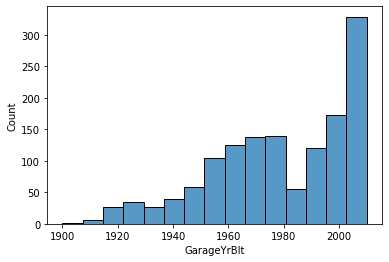

In [41]:
sns.histplot(df['GarageYrBlt'].dropna())